<a href="https://colab.research.google.com/github/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/tema4/aprendizaje_supervisado_tema4_modelo_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Lineal Regression  

# 1 - DEFINE THE PROBLEM

# 2 - IMPORT REQUIRED LIBRARIES  


In this section, we import all the Python libraries and tools necessary for data loading, analysis, visualization, and machine learning model development.

## 2.1 - Base Libraries
These libraries provide essential data manipulation and visualization tools.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import seaborn as sns

from math import sqrt
from pprint import pprint
from termcolor import colored

## 2.2 - ML/DL Libraries
We use Scikit-learn for preprocessing, model training, and evaluation.  
Only the necessary classifiers will be used depending on the model selection phase.

In [2]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_validate, cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

---
# 3 - LOAD THE DATA

In [3]:
archivo2 = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo2)

# 4 - EDA (Exploratory Data Analysis) of the DATA


In [4]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [5]:
X = df[['engine-size','curb-weight']]
X

,engine-size,curb-weight
0,130,2548
1,130,2548
2,152,2823
3,109,2337
4,136,2824
...,...,...
196,141,2952
197,141,3049
198,173,3012
199,145,3217


In [6]:
y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

---
# 5 - VISUALIZE THE DATA

In this section, we visualize the relationship between engine size and CO2 emissions to better understand data patterns and possible correlations.

---
# 6 - PRE-PROCESS THE DATA

In this step, we prepare the data for model training by handling missing values (if any), transforming features, and scaling variables as needed.

---
# 7 - SPLIT THE DATA

In [7]:
# Dividir 0.2 test y fijar semilla aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Estandarización de los datos de entrenamiento y test
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 8 - TRAIN A MODEL

We train a `LinearRegression` model and use `GridSearchCV` with 5-fold cross-validation.  
Although no hyperparameters are tuned, this still provides robust R² scoring.

In [10]:
model = LinearRegression()
score = make_scorer(r2_score)
cv = KFold(n_splits=5, shuffle=True, random_state=3)

grid = GridSearchCV(model, param_grid={}, scoring=score, cv=cv)
grid.fit(X_train, y_train)

cv_results = grid.cv_results_
mean_r2 = cv_results['mean_test_score'][0]
std_r2 = cv_results['std_test_score'][0]

print(f"Cross-validation R²: {mean_r2:.4f} ± {std_r2:.4f}")

Cross-validation R²: 0.7176 ± 0.1335


## 9 - EVALUATE AND TUNE THE MODEL

We evaluate model performance on the test set using multiple regression metrics.

In [11]:
y_pred = grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

metrics_summary = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE'],
    'Value': [mae, mse, rmse, r2, mape]
})

metrics_summary

,Metric,Value
0,MAE,3.743661e+03
1,MSE,3.102216e+07
2,RMSE,5.569754e+03
3,R²,7.464407e-01
4,MAPE,2.134310e+01


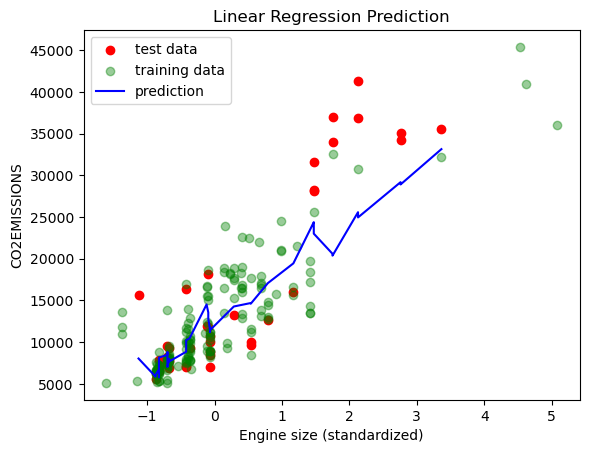

In [12]:
# Ordenar los valores por X_test[:, 0]
sorted_idx = np.argsort(X_test[:, 0])
x_sorted = X_test[sorted_idx, 0]
y_sorted = y_pred[sorted_idx]

# Dibujar
plt.scatter(X_test[:, 0], y_test, color='red', label='test data')
plt.scatter(X_train[:, 0], y_train, color='green', alpha=0.4, label='training data')
plt.plot(x_sorted, y_sorted, color='blue', label='prediction')  # ahora sí, ordenada

plt.xlabel('Engine size (standardized)')
plt.ylabel('CO2EMISSIONS')
plt.legend(loc='best')
plt.title('Linear Regression Prediction')
plt.show()

---
# 10 - INTERPRET RESULTS AND NEXT STEPS

## Interpretation
- The linear regression model achieves an **R² score of ~0.746**, meaning it explains approximately **74.6% of the variance** in CO2 emissions based on engine size.
- The **Mean Absolute Error (MAE)** is about **3743 g/km**, indicating the average prediction is off by that amount.
- The **Root Mean Squared Error (RMSE)** is **~5600 g/km**, slightly higher due to penalization of larger errors.
- The **Mean Absolute Percentage Error (MAPE)** is around **21.3%**, which suggests a moderate average relative error.

The scatter plot confirms a generally strong linear trend between engine size and CO2 emissions, although some deviations exist (especially for larger engines).

While not perfect, this result is **solid for a single-variable linear model** trained without hyperparameter tuning or feature engineering.

## Model Limitations

- The model only uses a single feature (`Engine size`), which limits its ability to capture other important factors.
- Some variance remains unexplained, as seen in the spread of red (test) points around the blue prediction line.
- The data may contain outliers or heteroscedasticity (variance not constant across engine sizes).


## Next Steps

To improve performance, consider the following:

- **Add more features**: include fuel consumption, vehicle mass, fuel type, etc.
- **Try polynomial regression**: to capture potential non-linear relationships.
- **Use regularized models**: such as Ridge or Lasso to reduce variance.
- **Tune models** using `GridSearchCV` to find optimal parameters.
- **Detect and handle outliers**, possibly with robust regression.
- **Deploy the model**: persist and expose it via an API if it meets business needs.